In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

In [297]:
df = pd.read_csv('stats.csv', header=0)
df_test = df.iloc[df.win.count()-298:df.win.count()]
df_train = df.iloc[0:df.win.count()-298]
df_train = df_train.sort_values(by=['win'])


train_x=df_train.iloc[:,9:12].values
train_y=df_train.iloc[:,1].values
test_x=df_test.iloc[:,9:12].values
test_y=df_test.iloc[:,1].values


#df_train.count()

In [323]:
class AdalineGD(object):
    
    def __init__(self, rychlost_ucenia=0.0001,pocet_iteracii = 10):
        self.rychlost_ucenia = rychlost_ucenia
        self.pocet_iteracii = pocet_iteracii
        
    def fit(self,X,y):
        
        self.w_ = np.zeros(1+X.shape[1])
        self.cost_=[]
        
        for i in range (self.pocet_iteracii):
            output = self.net_input(X)       
            errors = (y-output)
            self.w_[1:] += self.rychlost_ucenia * X.T.dot(errors)
            self.w_[0] += self.rychlost_ucenia * errors.sum()
            cost = (errors ** 2).sum()/2.0
            self.cost_.append(cost)
        plt.plot(self.cost_)
        return self
    
    def net_input(self,X):
        return np.dot(X,self.w_[1:])+self.w_[0]
    
    def linearna_aktivacia(self,X):
        return self.net_input(X)
    
    
    def predikcia(self,X):
        return np.where(self.linearna_aktivacia(X)>=0.0,1,-1)

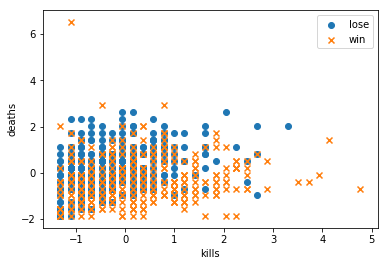

In [324]:
#vykreslime iba 100 udajov pre vacsiu prehladnost
plt.scatter(train_x[0:348, 0], train_x[0:348, 1], marker='o', label='lose')
plt.scatter(train_x[348:700, 0], train_x[348:700, 1], marker='x', label='win')
plt.xlabel('kills')
plt.ylabel('deaths')
plt.legend()

In [325]:
#neskalovane data
#moj_adaline = AdalineGD()
#moj_adaline.fit(train_x,train_y)

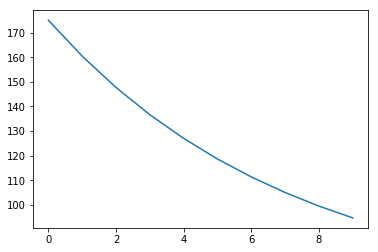

In [326]:
#skalovane data
train_x = preprocessing.scale(train_x)
test_x = preprocessing.scale(test_x)

moj_adaline = AdalineGD()
moj_adaline.fit(train_x,train_y)

In [327]:
uspesnost= moj_adaline.predikcia(test_x)
print('Presnosť siete je: ', accuracy_score(test_y, uspesnost)*100,"%")

Presnosť siete je:  48.65771812080537 %
